참고 링크 : https://www.fun-coding.org/Chapter19-greedy-live.html

##### greedy algorithm 기초 연습

# 탐욕 알고리즘의 이해

#### 1. 탐욕 알고리즘이란?
- Greedy algorithm 또는 탐욕 알고리즘이라 불리움
- 최적의 해에 가까운 값을 구하기 위해 사용
- 여러 경우 중 하나를 결정해야 할 때마다 , __매 순간 최적이라고 생각되는 경우를 선택__하는 방식으로 진행해서, 최종적인 값을 구하는 방식

#### 2. 탐욕 알고리즘 예
__문제1 : 동전문제__
- 지불해야 하는 값이 4720원 일 때, 1원 50원 100원, 500원 동전으로 동전의 수가 가장 적게 지불하시오.
    - 가장 큰 동전부터 최대한 지불해야 하는 값을 채우는 방식으로 구현 가능
    - 탐욕 알고리즘으로 매 순간 최적이라고 생각되는 경우를 선택

In [14]:
coin_list = [1, 100, 50, 500]
print(coin_list)

coin_list.sort(reverse = True)
print(coin_list)

[1, 100, 50, 500]
[500, 100, 50, 1]


In [15]:
import datetime

print(datetime.datetime.now())

2021-02-18 19:38:27.344036


In [18]:
value = 4720
coin_list = [500, 100, 50, 1]

def min_coin_count(value, coin_list):
    answer = 0
    total_coin_count = 0
    details = []
    coin_list = sorted(coin_list, reverse = True)
    
    for coin in coin_list:
        cnt = value // coin
        answer += cnt
        details.append(cnt)
        value = value % coin
    
    return answer, details

min_coin_count(value, coin_list)

(31, [9, 2, 0, 20])

__문제2 : 부분 배낭 문제 (Fractional Knapsack Problem)__
- 무게 제한이 k인 배낭에 최대 가치를 가지도록 물건을 넣는 문제
    - 각 물건은 무게(w)와 가치(v)로 표현될 수 있음
    - 물건은 쪼갤 수 있으므로 물건의 일부분이 배낭에 넣어질 수 있음, 그래서 Fractional Knapsack Problem 으로 부름
        - Fractional Knapsack Problem 의 반대로 물건을 쪼개서 넣을 수 없는 배낭 문제도 존재함 (0/1 Knapsack Problem 의 반대로 물건을 쪼개서 넣을 수 없는 배낭 문제도 존재함 (0/1 Knapsack Problem 으로 부름)
        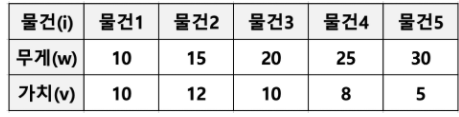

In [19]:
import datetime

print(datetime.datetime.now())

2021-02-18 19:47:23.622460


In [26]:
#쪼갤 수 있다는것을 명심하고 풀자,,

data_list = [(10,10), (15,12), (20,10), (25, 8), (30,5)]
capacity = 30

def get_max_value(data_list, capacity):
    
    total_value = 0
    
    data_list = sorted(data_list, reverse=True, key = lambda x : x[1] / x[0])
    
    for data in data_list:
        if capacity - data[0] >= 0:
            capacity -= data[0]
            total_value += data[1]
        else:
            fraction = capacity / data[0]
            total_value += data[1] * fraction
            break
            
    return total_value

get_max_value(data_list, capacity)

24.5

##### 3. 탐욕 알고리즘의 한계
- 탐욕 알고리즘은 근사치 추정에 활용
- 반드시 최적의 해를 구할 수 있는 것은 아니기 때문
- 최적의 해에 가까운 값을 구하는 방법중 하나임

# 프로그래머스 > 탐욕법(Greedy) > 구명보트

https://programmers.co.kr/learn/courses/30/lessons/42885?language=python3
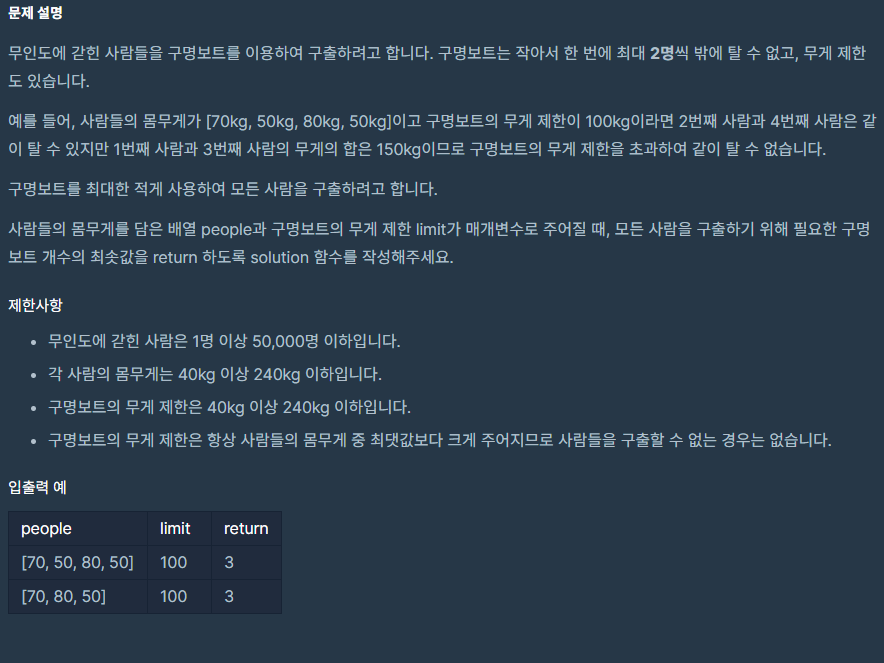

In [124]:
people = [80,70,60,50,50, 45, 90, 140, 130, 90, 130]
limit = 200

def solution(people, limit):
    
    
    answer = 0
    
    people = sorted(people, reverse = True)
        
    boat_list = []
    
    for index, p in enumerate(people):
        if p == 0:
            continue
        
        
        #보트 첫 탑승자
        
        boat = []
        answer += 1
        print('#', answer)
        
        #태울 사람 탐색
        for j in range(index, len(people)):
            #태울 수 있는 경우
            if people[j] <= limit - sum(boat):
                
                boat.append(people[j])
                people[j] = 0
                
                print('사람 태움 : ', boat)
                
            #남은 공간이 40kg 이하인 경우 절대로 아무도못태움 => 새 보트 준비할 생각해야함
            elif limit - sum(boat) < 40:
                boat_list.append(boat)
              #  print('boat : ', boat)
                break
                
        print(sum(boat))
        
    return answer

solution(people, limit)

# 1
사람 태움 :  [140]
사람 태움 :  [140, 60]
200
# 2
사람 태움 :  [130]
사람 태움 :  [130, 70]
사람 태움 :  [130, 70, 0]
200
# 3
사람 태움 :  [130]
사람 태움 :  [130, 0]
사람 태움 :  [130, 0, 0]
사람 태움 :  [130, 0, 0, 50]
180
# 4
사람 태움 :  [90]
사람 태움 :  [90, 90]
180
# 5
사람 태움 :  [80]
사람 태움 :  [80, 0]
사람 태움 :  [80, 0, 0]
사람 태움 :  [80, 0, 0, 0]
사람 태움 :  [80, 0, 0, 0, 50]
사람 태움 :  [80, 0, 0, 0, 50, 45]
175


5